### Импорт библиотек
Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

### Загрузим датасеты.

#### Location
**01_Location_July.csv** и **01_CLocation_July.csv** - Сгенерированный датасет о численности населения на территории Москвы и с гранулярностью по районам города Москвы и секторами 500х500 метров.

***Характер данных***: Данные об изменении численности населения на территории

***Временное разбиение***: календарный месяц

***Территориальное разбиение***: Москва, разбитая по административным районам и на сектора 500х500м.

***Перечень показателей данных в данных:***
- Количество человек, проживающих на территории района/сектора
- Количество человек, работающих на территории района/сектора
- Количество человек, которые находились на территории района/сектора по будням в дневное время чаще, чем в любых других районах/секторах, в рассматриваемый месяц
- Количество человек, проживающих на территории района/сектора и имеющих разъездную работу

In [48]:
df_cloc = pd.read_csv('./datasets/01_CLocation_July.csv')
print(df_cloc.shape)
df_cloc.head(3)

(10240, 5)


,zid,customers_cnt_home,customers_cnt_job,customers_cnt_day,customers_cnt_move
0,32909,4,0,0,0
1,32910,25,8,26,0
2,33261,2,0,2,0


In [3]:
df_cloc.describe()

,zid,customers_cnt_home,customers_cnt_job,customers_cnt_day,customers_cnt_move
count,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000
mean,83354.220801,849.844043,437.173340,746.294727,46.906055
std,26541.011327,1259.753844,967.704186,1255.423503,72.207831
min,32909.000000,1.000000,0.000000,0.000000,0.000000
25%,61420.750000,32.000000,8.000000,27.000000,1.000000
50%,84247.500000,162.000000,52.000000,132.000000,7.000000
75%,105738.250000,1268.250000,497.000000,1055.000000,70.000000
max,139343.000000,8887.000000,14870.000000,15741.000000,441.000000


In [49]:
df_loc = pd.read_csv('./datasets/01_Location_July.csv')
print(df_loc.shape)
df_loc.head(3)

(146, 5)


,zid,customers_cnt_home,customers_cnt_job,customers_cnt_day,customers_cnt_move
0,1,31723,11029,23944,1411
1,2,64780,15890,40845,3536
2,3,69098,39701,63486,4161


In [5]:
df_loc.describe()

,zid,customers_cnt_home,customers_cnt_job,customers_cnt_day,customers_cnt_move
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,87.876712,59646.335616,30699.972603,52397.143836,3291.547945
std,70.122149,29518.906950,29366.464478,34005.814909,1813.331668
min,1.000000,6110.000000,1211.000000,3370.000000,347.000000
25%,37.250000,40128.750000,12508.750000,30895.000000,2024.500000
50%,73.500000,56641.000000,23154.000000,45121.500000,3205.500000
75%,109.750000,72915.750000,38872.500000,64568.000000,4157.000000
max,276.000000,170772.000000,179375.000000,213125.000000,10472.000000


#### Matrix_Home_Work

**04_Matrix_Home_Work_July**; **04_CMatrix_Home_Work_July.csv** - Сгенерированный датасет о динамике перемещения населения дом-работа на территории Москвы (Матрица корреспонденции дом-работа) и с гранулярностью по районам города Москвы и секторами 500х500 метров.

***Характер данных***: Данные Матрица корреспонденции дом-работа

***Временное разбиение***: календарный месяц

***Территориальное разбиение***: Москва, разбитая по административным районам и на сектора 500х500м.

***Перечень показателей данных в данных:***

- Количество человек, место проживания которых в отчетном месяце находится в районе/секторе А, а место работы - в районе/секторе В

In [6]:
df_chome_work = pd.read_csv('./datasets/04_CMatrix_Home_Work_July.csv')
df_chome_work.describe()

,home_zid,work_zid,customers_cnt
count,724443.000000,724443.000000,724443.000000
mean,102367.038804,104025.091897,14.168672
std,21472.454803,20157.290571,120.538750
min,-2.000000,-2.000000,1.000000
25%,94413.000000,99808.000000,2.000000
50%,104591.000000,108662.000000,3.000000
75%,116118.000000,113839.000000,3.000000
max,139343.000000,139343.000000,6178.000000


<AxesSubplot:>

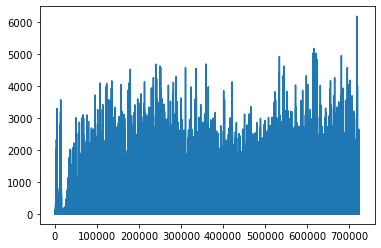

In [7]:
df_chome_work['customers_cnt'].plot()

In [8]:
df_home_work = pd.read_csv('./datasets/04_Matrix_Home_Work_July.csv')
df_home_work.describe()

,home_zid,work_zid,customers_cnt
count,20608.000000,20608.000000,20608.000000
mean,85.175320,83.041828,498.779988
std,68.865673,66.775621,3723.609495
min,-2.000000,-2.000000,0.000000
25%,35.000000,35.000000,9.000000
50%,72.000000,70.000000,31.000000
75%,108.000000,106.000000,106.000000
max,276.000000,276.000000,113207.000000


<AxesSubplot:>

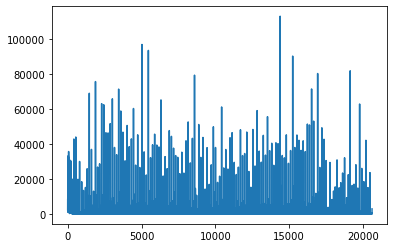

In [9]:
df_home_work['customers_cnt'].plot()

In [10]:
print('Количество значений с zid = -2:', df_home_work.loc[df_home_work['home_zid'] == -2].shape[0])

Количество значений с zid = -2: 146


In [11]:
print('Количество значений с zid = -2:', df_home_work.query('home_zid <= 0 or work_zid <= 0').shape[0])

Количество значений с zid = -2: 584


In [12]:
print(
    'Процент значений в Matrix_Home_Work_July с zid<=0:',
    round(df_home_work.loc[(df_home_work['home_zid'] <= 0) | (df_home_work['work_zid'] <= 0)].shape[0]/df_home_work.shape[0]*100, 2),
    '%'
)


Процент значений в Matrix_Home_Work_July с zid<=0: 2.83 %


In [13]:
print(
    'Процент значений в CMatrix_Home_Work_July с zid<=0:',
    round(df_chome_work.loc[(df_chome_work['home_zid'] <= 0) | (df_chome_work['work_zid'] <= 0)].shape[0]/df_chome_work.shape[0]*100, 2),
    '%'
)


Процент значений в CMatrix_Home_Work_July с zid<=0: 4.48 %


### Административное деление районов

Загрузим так же справочник соотношения секторов 500х500м и административного деления районов Москвы

In [14]:
#df_sector_rel = pd.read_excel('./datasets/Справочник_соотношения_секторов_500х500м_и_адм_районов_МСК.xlsx')
#df_sector_rel.to_csv('./datasets/relations_between_500x500_and_MSC.csv', index=False)
df_sector_rel = pd.read_csv('./datasets/relations_between_500x500_and_MSC.csv')
df_sector_rel.head(3)

,cell_zid,area_peresechenia_s_admzone_kv.km,adm_zid,adm_name,okrug_name,sub_ter
0,32909,0.407116,216,Роговское,Троицкий административный округ,Новая Москва
1,32910,1.003458,216,Роговское,Троицкий административный округ,Новая Москва
2,33261,0.233312,216,Роговское,Троицкий административный округ,Новая Москва


In [50]:
df_sector_rel.describe()

,cell_zid,area_peresechenia_s_admzone_kv.km,adm_zid
count,13232.000000,1.323200e+04,13232.000000
mean,86399.263755,1.907860e+00,145.154776
std,26044.221345,8.655121e-01,88.766849
min,32909.000000,1.000000e-08,1.000000
25%,64572.750000,1.382770e+00,60.000000
50%,89067.000000,2.500603e+00,187.000000
75%,108079.250000,2.500670e+00,228.000000
max,139343.000000,2.500685e+00,276.000000


In [30]:
df_sector_rel['sub_ter'].value_counts()

Новая Москва     6734
Старая Москва    6498
Name: sub_ter, dtype: int64

In [39]:
new_zid_list = df_sector_rel.query('sub_ter == "Новая Москва"')['cell_zid'].to_list()

In [44]:
df_cloc[df_cloc['zid'].isin(new_zid_list)]

,zid,customers_cnt_home,customers_cnt_job,customers_cnt_day,customers_cnt_move
0,32909,4,0,0,0
1,32910,25,8,26,0
2,33261,2,0,2,0
3,33262,13,2,11,0
4,33263,10,0,3,0
...,...,...,...,...,...
6716,97395,586,214,481,30
6723,97403,2864,679,1507,201
6724,97404,1235,277,622,60
6725,97405,839,655,921,44


In [45]:
df_cloc[~df_cloc['zid'].isin(new_zid_list)]

,zid,customers_cnt_home,customers_cnt_job,customers_cnt_day,customers_cnt_move
4315,75683,508,123,326,18
4316,75684,316,63,168,20
4388,76301,1697,255,899,105
4389,76302,1979,260,925,147
4462,76919,1424,296,776,77
...,...,...,...,...,...
10235,138913,77,455,495,1
10236,138914,165,796,884,8
10237,138915,587,1341,1661,19
10238,138916,1206,1669,2177,47


In [15]:
df_sector_rel.describe()

,cell_zid,area_peresechenia_s_admzone_kv.km,adm_zid
count,13232.000000,1.323200e+04,13232.000000
mean,86399.263755,1.907860e+00,145.154776
std,26044.221345,8.655121e-01,88.766849
min,32909.000000,1.000000e-08,1.000000
25%,64572.750000,1.382770e+00,60.000000
50%,89067.000000,2.500603e+00,187.000000
75%,108079.250000,2.500670e+00,228.000000
max,139343.000000,2.500685e+00,276.000000


### Загрузим геоданные

In [16]:
shp_admzones = gpd.read_file('./datasets/admzones2021/admzones2021.shp')
shp_fishnet = gpd.read_file('./datasets/fishnet2021/fishnet2021.shp')

In [17]:
shp_admzones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   adm_zid     206 non-null    int64   
 1   adm_name    206 non-null    object  
 2   okrug_name  146 non-null    object  
 3   sub_ter     206 non-null    object  
 4   okrug_id    146 non-null    float64 
 5   area        206 non-null    float64 
 6   geometry    206 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 11.4+ KB


In [46]:
shp_fishnet.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 189892 entries, 0 to 189891
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   cell_zid  189892 non-null  int64   
 1   geometry  189892 non-null  geometry
dtypes: geometry(1), int64(1)
memory usage: 2.9 MB


In [18]:
shp_admzones.head()

,adm_zid,adm_name,okrug_name,sub_ter,okrug_id,area,geometry
0,519,Коломна,None,Московская область,NaN,1.728866e+09,"POLYGON ((38.30978 54.86069, 38.30978 54.86069..."
1,507,Дзержинский,None,Московская область,NaN,1.566430e+07,"POLYGON ((37.79389 55.62307, 37.79601 55.62424..."
2,109,Перово,Восточный административный округ,Старая Москва,561.0,9.829908e+06,"POLYGON ((37.75633 55.75959, 37.76380 55.76104..."
3,533,Мытищи,None,Московская область,NaN,4.312459e+08,"POLYGON ((37.73215 55.87984, 37.73064 55.88059..."
4,66,Тверской,Центральный административный округ,Старая Москва,569.0,7.322588e+06,"POLYGON ((37.61262 55.78248, 37.61457 55.78181..."


In [19]:
shp_fishnet.head()

,cell_zid,geometry
0,0,"POLYGON ((38.64721 54.25524, 38.64733 54.25973..."
1,1,"POLYGON ((38.65488 54.25517, 38.65500 54.25966..."
2,2,"POLYGON ((38.66255 54.25510, 38.66268 54.25959..."
3,3,"POLYGON ((38.67022 54.25502, 38.67035 54.25951..."
4,4,"POLYGON ((38.67789 54.25495, 38.67802 54.25944..."


In [52]:
#shp_fishnet.plot(figsize=(17,17))
#shp_admzones.plot(figsize=(17,17))
#plt.show()

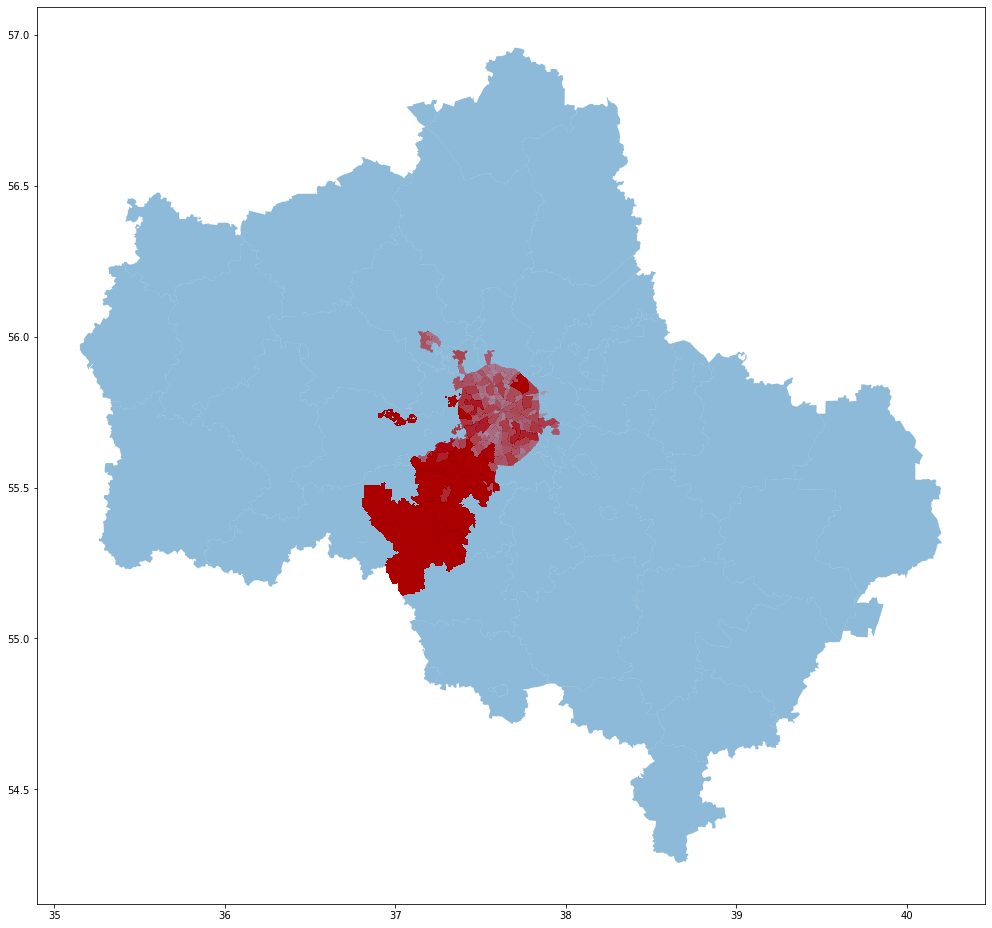

In [28]:
ax = shp_admzones.plot(figsize=(17,17), alpha=0.5)

pd.merge(
    shp_admzones,
    df_sector_rel[['cell_zid', 'adm_zid']],
    how="inner",
    on='adm_zid',
    sort=False,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
).plot(figsize=(17,17), color='red', ax=ax, alpha=0.01)

plt.show()

In [ ]:
#df_sector_rel = pd.read_excel('./datasets/Справочник_соотношения_секторов_500х500м_и_адм_районов_МСК.xlsx')
#df_sector_rel.to_csv('./datasets/relations_between_500x500_and_MSC.csv', index=False)
df_sector_rel = pd.read_csv('./datasets/relations_between_500x500_and_MSC.csv')

In [56]:
pd.read_excel('./data_mos_ru/data-4113-2021-10-11.xlsx').to_csv('./data_mos_ru/culture.csv', index=False)

/Users/iliakhokhlov/miniforge3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [66]:
df_culture = pd.read_csv('./data_mos_ru/culture.csv').drop(['ObjectName', 'geoarea', 'Link'], axis=1)

In [67]:
df_culture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               516 non-null    int64 
 1   ObjectNameOnDoc  516 non-null    object
 2   global_id        516 non-null    int64 
 3   geodata_center   516 non-null    object
dtypes: int64(2), object(2)
memory usage: 16.2+ KB


In [90]:
import json
def coords(row):
    data = row['geodata_center']
    coord = json.loads(data)['coordinates']
    type_ = json.loads(data)['type']
    return coord, type_

In [71]:
df_culture

,ID,ObjectNameOnDoc,global_id,geodata_center
0,7537,Охранная (объединенная охранная) зона № 246,19657446,"{""coordinates"":[37.6829129971731,55.7449717020..."
1,7538,Охранная (объединенная охранная) зона,19657447,"{""coordinates"":[37.691525940131,55.73239338502..."
2,7539,Охранная (объединенная охранная) зона,19657448,"{""coordinates"":[37.6783533222778,55.7328870382..."
3,7540,Охранная (объединенная охранная) зона,19657449,"{""coordinates"":[37.5631385343507,55.7203998495..."
4,7541,Охранная (объединенная охранная) зона,19657450,"{""coordinates"":[37.4734141045037,55.7668006517..."
...,...,...,...,...
511,15685,Охранная зона объекта культурного наследия фед...,19657957,"{""coordinates"":[37.5674474887655,55.7332135163..."
512,16324,Зона регулирования застройки и хозяйственной д...,19657958,"{""coordinates"":[37.6286765715031,55.7654513933..."
513,16338,охранная зона объекта культурного наследия фед...,19657959,"{""coordinates"":[37.785402333162,55.78127890215..."
514,16641,"Охранная зона объекта культурного значения ""Це...",19657960,"{""coordinates"":[37.8129044286215,55.7584223166..."


In [83]:
df_culture['geodata_center'][0]

'{"coordinates":[37.6829129971731,55.744971702052],"type":"Point"}'

In [84]:
import json

In [89]:
json.loads(df_culture['geodata_center'][0])['type']

'Point'

In [94]:
df_culture[['coordinates', 'type']] = df_culture.apply(coords, axis=1, result_type='expand')

In [98]:
df_culture

,ID,ObjectNameOnDoc,global_id,geodata_center,coordinates,type
0,7537,Охранная (объединенная охранная) зона № 246,19657446,"{""coordinates"":[37.6829129971731,55.7449717020...","[37.6829129971731, 55.744971702052]",Point
1,7538,Охранная (объединенная охранная) зона,19657447,"{""coordinates"":[37.691525940131,55.73239338502...","[37.691525940131, 55.7323933850285]",Point
2,7539,Охранная (объединенная охранная) зона,19657448,"{""coordinates"":[37.6783533222778,55.7328870382...","[37.6783533222778, 55.732887038279]",Point
3,7540,Охранная (объединенная охранная) зона,19657449,"{""coordinates"":[37.5631385343507,55.7203998495...","[37.5631385343507, 55.720399849599]",Point
4,7541,Охранная (объединенная охранная) зона,19657450,"{""coordinates"":[37.4734141045037,55.7668006517...","[37.4734141045037, 55.7668006517935]",Point
...,...,...,...,...,...,...
511,15685,Охранная зона объекта культурного наследия фед...,19657957,"{""coordinates"":[37.5674474887655,55.7332135163...","[37.5674474887655, 55.7332135163875]",Point
512,16324,Зона регулирования застройки и хозяйственной д...,19657958,"{""coordinates"":[37.6286765715031,55.7654513933...","[37.6286765715031, 55.7654513933635]",Point
513,16338,охранная зона объекта культурного наследия фед...,19657959,"{""coordinates"":[37.785402333162,55.78127890215...","[37.785402333162, 55.7812789021545]",Point
514,16641,"Охранная зона объекта культурного значения ""Це...",19657960,"{""coordinates"":[37.8129044286215,55.7584223166...","[37.8129044286215, 55.7584223166165]",Point
